In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import numpy as np
import random
import numpy.random as rd
import matplotlib.pyplot as plt

import import_ipynb
import sys
#import boris_stepper
from Functions import push_particles

%matplotlib inline
%matplotlib notebook

importing Jupyter notebook from Functions.ipynb


In [3]:
path_in = 'C:\\Users\\mathe\\OneDrive\\Área de Trabalho\\Monte Carlo\\23102023\\Simulação eventos\\'

## Funções 

In [4]:
def MB_speed(v,m,T):
    """ Distribuição de velocidades de Maxwell-Boltzmann """
    kB = 1.38e-23
    return (m/(2*np.pi*kB*T))**1.5 * 4*np.pi * v**2 * np.exp(-m*v**2/(2*kB*T))

from scipy.special import erf

def MB_CDF(v,m,T):
    """ Distribuição Cumulativa da função de velocidades de Maxwell-Boltzmann """
    kB = 1.38e-23
    a = np.sqrt(kB*T/m)
    return erf(v/(np.sqrt(2)*a)) - np.sqrt(2/np.pi)* v* np.exp(-v**2/(2*a**2))/a

def generate_velocities(n):
    """ Geração de um conjunto de vetores velocidades a partir da função inversa de MB"""
    
    #rand_nums = np.random.random(n)
    rand_nums = np.random.uniform(0,0.999,n)
    speeds = inv_cdf(rand_nums)
    
    # spherical polar coords - generate random angle for velocity vector, uniformly distributed over the surface of a sphere
    # see http://mathworld.wolfram.com/SpherePointPicking.html for more info (note theta and phi are the other way around!)
    
    #theta = np.pi/2
    theta = np.arccos(np.random.uniform(-1,1,n))
    phi = np.random.uniform(0,2*np.pi,n)
    
    # convert to cartesian units
    vx = speeds * np.sin(theta) * np.cos(phi) 
    vy = speeds * np.sin(theta) * np.sin(phi)
    vz = speeds * np.cos(theta)

    return speeds, vx, vy, vz, rand_nums, theta, phi

## Parâmetros do evento 

In [5]:
# Massa da partícula em função da massa do elétron
m = 1.836e3
me= 9.10938356e-31 # massa do elétron em kg.

B = 6.27     # nT
n = 7.94     # cm^-3
T = 8.78*1e5 # K
v1 = 503*1e3      # km/s  4.95e5  

### Distribuição de velocidades sem o drift

<IPython.core.display.Javascript object>


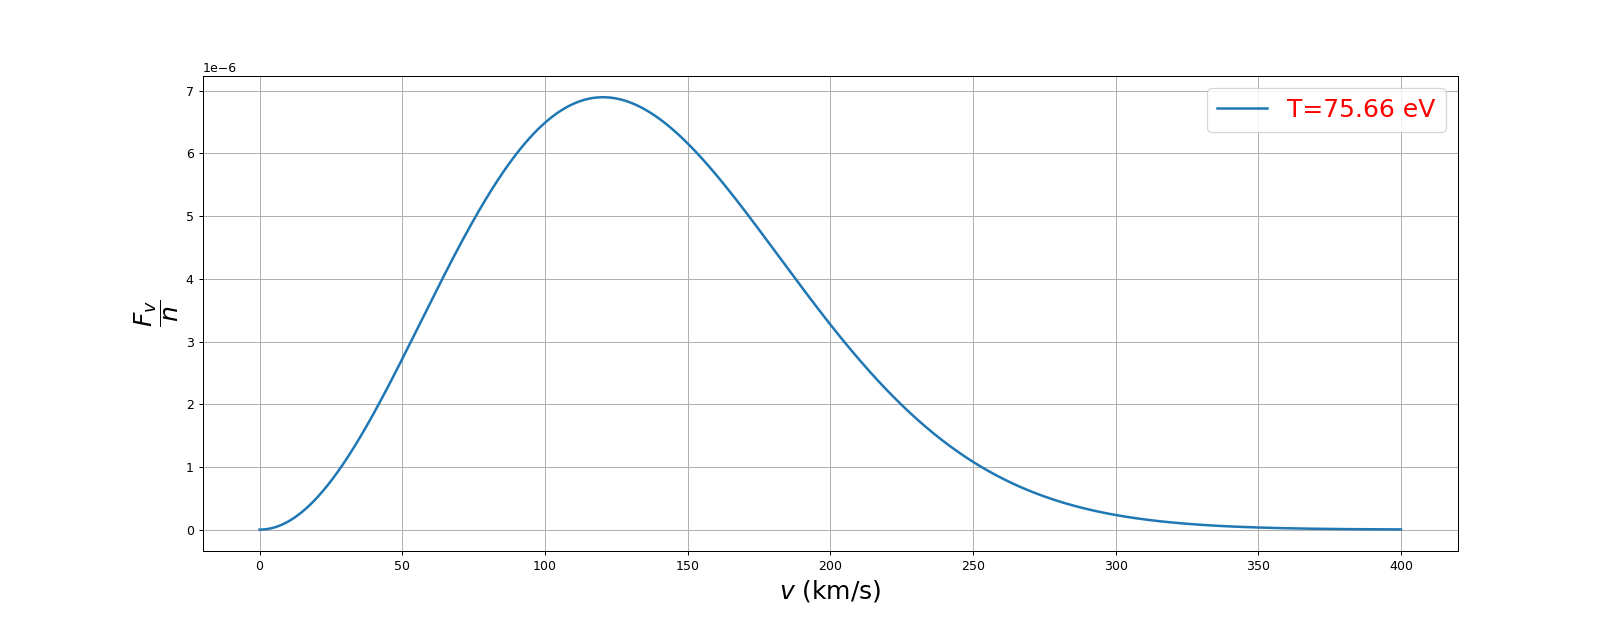

In [6]:
fig,ax = plt.subplots(1,1,figsize=(18,7))

pmass = m*me             # massa do próton em kg

vr   = 4.00e5             # range do plot em m/s
v_i = np.arange(0,vr,1)   # vetor de velocidades

# Função de distribuição

fv = MB_speed(v_i,pmass,T)

#Conversão de K em eV (11604 K/eV) 
T1 = round(T/11604,2)

# Gráfico
ax.plot(v_i/1e3,fv,label='T='+str(T1)+' eV',lw=2)

ax.legend(loc=0, fontsize=20, labelcolor= 'red')
ax.set_xlabel(r'$v$ (km/s)', size=20)
ax.set_ylabel(r'$\dfrac{F_v}{n}$', size=20)

ax.grid()
#plt.savefig('Distribuição_SPEED.png', dpi=300, bbox_inches = 'tight',transparent=False)

plt.show()

### Criação da função cumulativa e sua inversa (através de interpolação)

In [7]:
from scipy.interpolate import interp1d as interp

# Criação da função de distribuição cumulativa(CDF).

cdf = MB_CDF(v_i,pmass,T) # essentially y = f(x)

#create interpolation function to CDF
inv_cdf = interp(cdf,v_i) # essentially what we have done is made x = g(y) from y = f(x)
                         # this can now be used as a function which is 
                         # called in the same way as normal routines

<IPython.core.display.Javascript object>


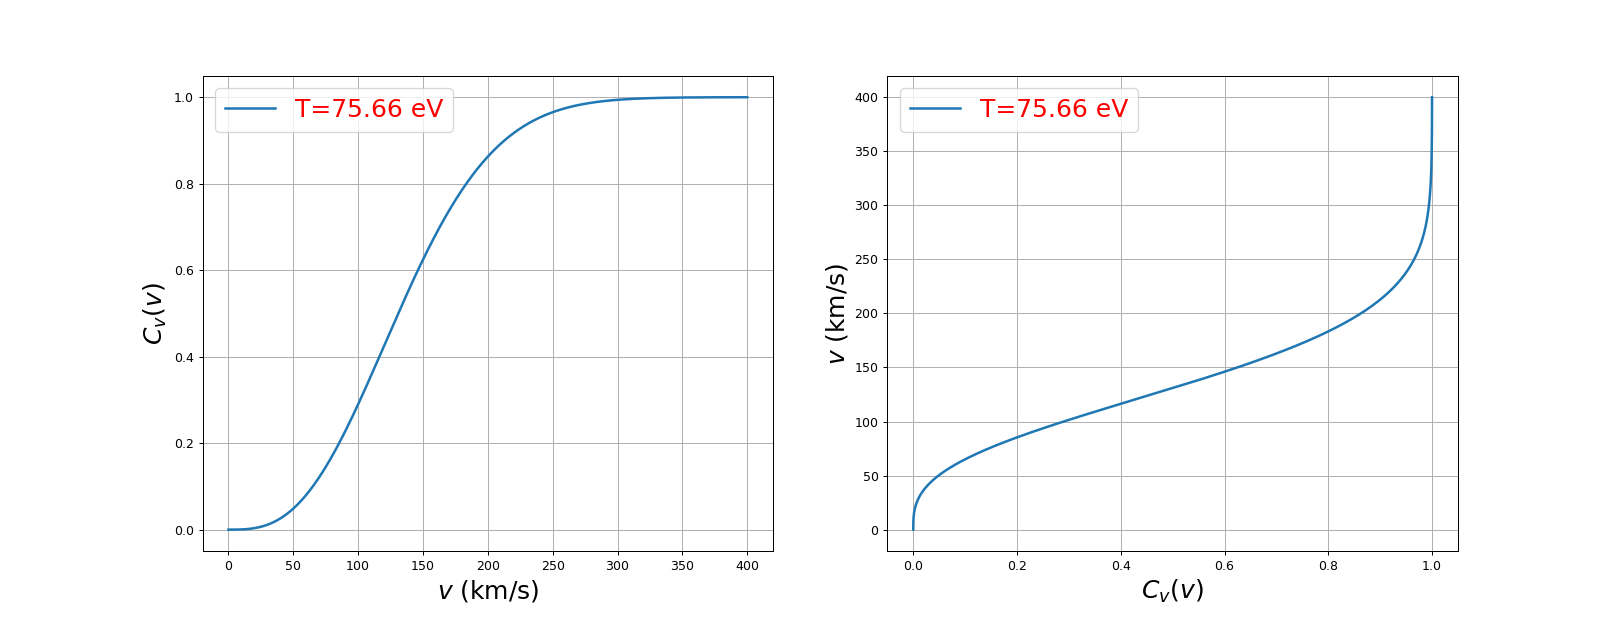

In [8]:
fig,ax = plt.subplots(1,2,figsize=(18,7))

#Gráficos

ax[0].plot(v_i/1e3,cdf,label='T='+str(T1)+' eV',lw=2)
ax[0].set_xlabel(r'$v$ (km/s)', size= 20)
ax[0].set_ylabel(r'$C_v(v)$', size=20)

ax[1].plot(cdf,inv_cdf(cdf)/1e3,label='T='+str(T1)+' eV',lw=2)
ax[1].set_xlabel(r'$C_v(v)$', size=20)
ax[1].set_ylabel(r'$v$ (km/s)',size=20)

for n in range(2):
    ax[n].legend(loc=0, fontsize=20, labelcolor='red')
    ax[n].grid()
    
#plt.savefig('Cumulativa_e_inversa.png', dpi=300, bbox_inches = 'tight',transparent=False)

plt.show()

* ## Geração dos vetores 

<IPython.core.display.Javascript object>


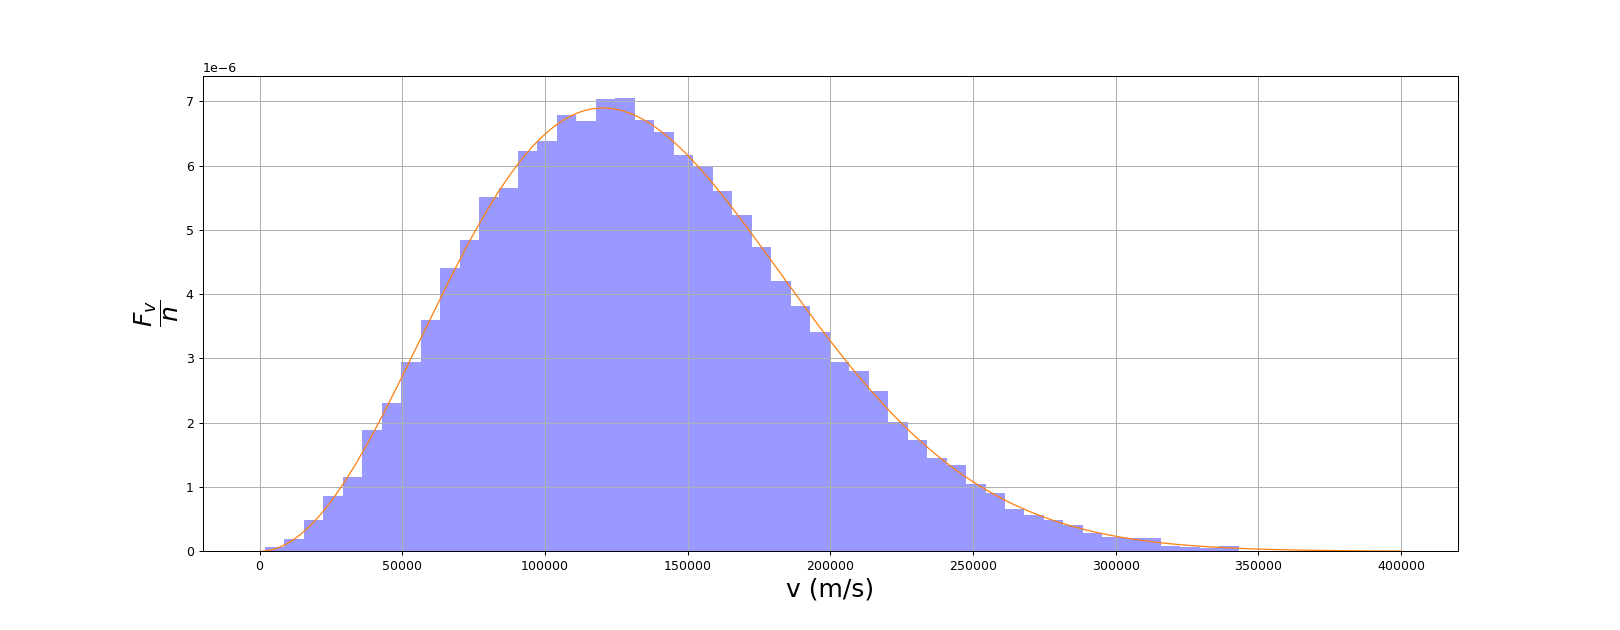

In [25]:
spd, vxi, vyi, vzi, num, theta, phi = generate_velocities(50000)

fig,ax = plt.subplots(1,1,figsize=(18,7))

#generate histogram of velocities
ax.hist(spd,bins=50,fc='b',alpha=0.4,lw=0.2, density=True)

ax.plot(v_i,fv,label='T='+str(T)+' K',lw=1)

ax.set_xlabel(r'v (m/s)', size=20)
ax.set_ylabel(r'$\dfrac{F_v}{n}$', size=20)
ax.grid()

plt.show()

<IPython.core.display.Javascript object>


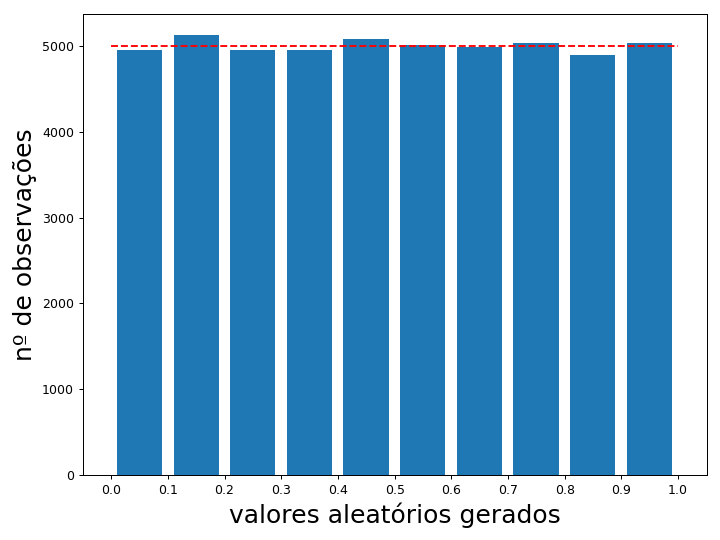

In [26]:
plt.figure(figsize=(8,6))

plt.hist(num,10,rwidth=.8)

plt.plot([0,1], [50000//10, 50000//10], '--r')

plt.xlabel('valores aleatórios gerados',size=20)
plt.ylabel('nº de observações',size=20)

b = np.linspace(0,1,11)
plt.xticks(b)

plt.tight_layout()

#plt.savefig(path_in+'Valores_aleatórios.png', dpi=300, bbox_inches = 'tight',transparent=False)

plt.show()

### Função distribuição da componente $V_x$

<IPython.core.display.Javascript object>


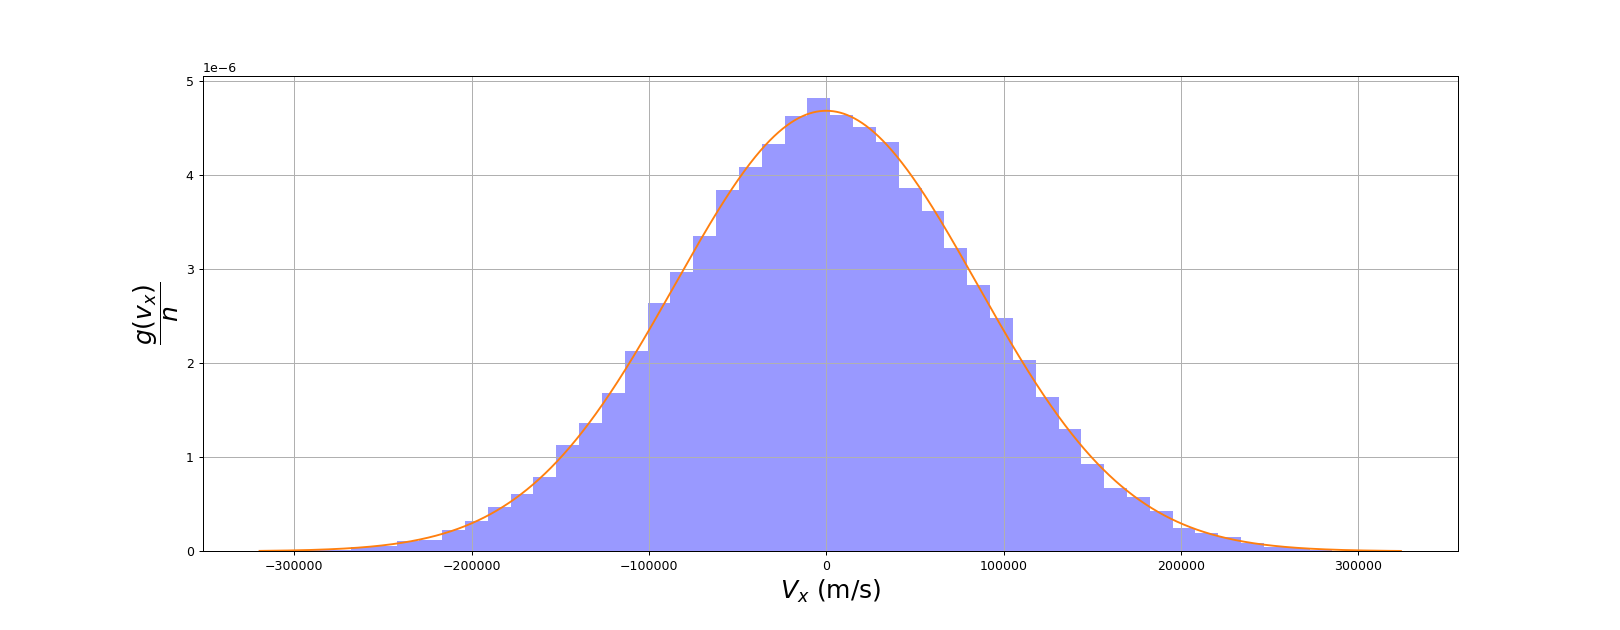

In [27]:
fig,ax = plt.subplots(1,1,figsize=(18,7))

ax.hist(vxi,bins=50,fc='b',alpha=0.4,lw=0.2, density=True)

v_xi = np.arange(min(vxi), max(vxi))

kB = 1.38e-23
a = np.sqrt(kB*T/pmass)

y = 1/(a*np.sqrt(2*np.pi))*np.exp(-0.5*(v_xi)**2/a**2)

ax.plot(v_xi,y)


ax.set_xlabel(r'$V_x$ (m/s)', size= 20)
ax.set_ylabel(r'$\dfrac{g(v_x)}{n}$',size=20)
ax.grid()

#plt.savefig('GeraçãodeVx.png', dpi=300, bbox_inches = 'tight',transparent=False)
plt.show()

### Função distribuição da componente $V_y$

<IPython.core.display.Javascript object>


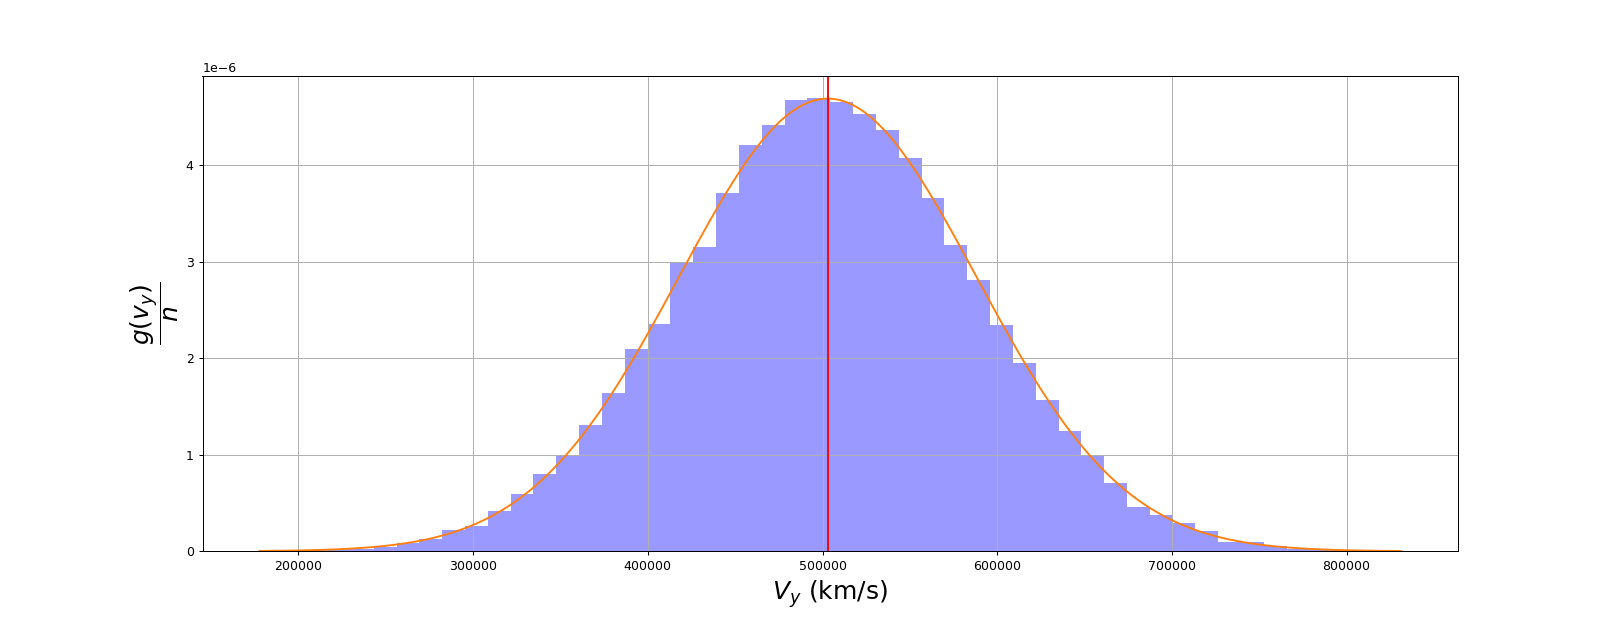

In [28]:
v_d = (vyi + v1)

fig,ax = plt.subplots(1,1,figsize=(18,7))

ax.hist(v_d,bins=50,fc='b',alpha=0.4,lw=0.2, density=True)

v_yi = np.arange(min(v_d), max(v_d))

kB = 1.38e-23
a = np.sqrt(kB*T/pmass)

y = 1/(a*np.sqrt(2*np.pi))*np.exp(-0.5*(v_yi-v1)**2/a**2)

ax.plot(v_yi,y)
ax.axvline(v1,color='red')

ax.set_xlabel(r'$V_y$ (km/s)',size=20)
ax.set_ylabel(r'$\dfrac{g(v_y)}{n}$',size=20)
ax.grid()

#plt.savefig('GeraçãodeVydrif.png', dpi=300, bbox_inches = 'tight',transparent=False)
plt.show()

### Função distribuição da componente $V_z$

<IPython.core.display.Javascript object>


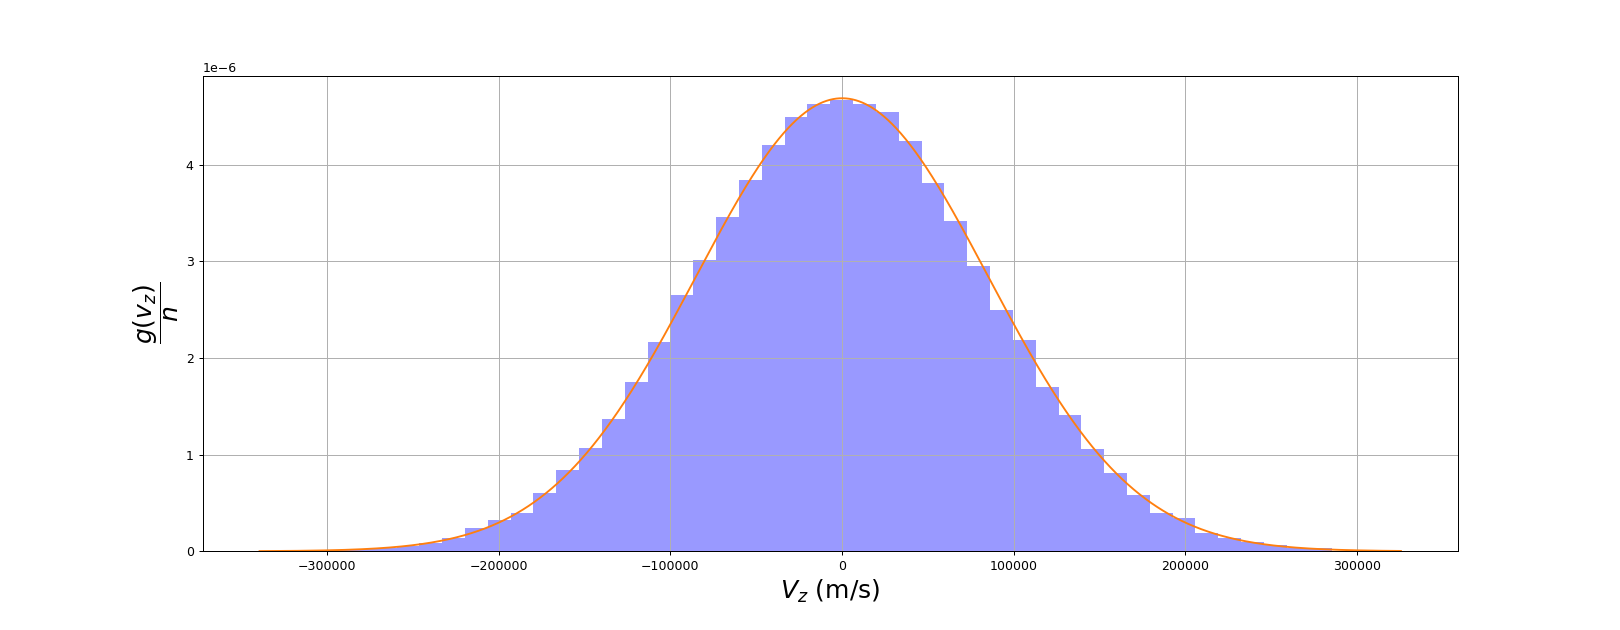

In [29]:
fig,ax = plt.subplots(1,1,figsize=(18,7))

ax.hist(vzi,bins=50,fc='b',alpha=0.4,lw=0.2, density=True)

#x = maxwell.ppf(v_d)

v_zi = np.arange(min(vzi), max(vzi))

kB = 1.38e-23
a = np.sqrt(kB*T/pmass)

y = 1/(a*np.sqrt(2*np.pi))*np.exp(-0.5*(v_zi)**2/a**2)

ax.plot(v_zi,y)


ax.set_xlabel(r'$V_z$ (m/s)', size= 20)
ax.set_ylabel(r'$\dfrac{g(v_z)}{n}$',size=20)
ax.grid()

#plt.savefig('GeraçãodeVx.png', dpi=300, bbox_inches = 'tight',transparent=False)
plt.show()

* ### Salvamento e Carregamento 

In [30]:
np.savetxt(path_in+'Vx_MB.txt', vxi) ; np.savetxt(path_in+'Vy_MB.txt', v_d); np.savetxt(path_in+'Vz_MB.txt', vzi); np.savetxt(path_in+'n.txt',num)
#spd, vxi, vyi, vzi